----
# Kwantyzacja
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej

In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio


In [22]:
#global variables
amplitude    = 256.0
step_size    = 32.0

time         = np.linspace(0, 2*np.pi, 2000)
signal_big   = (amplitude*0.9) * np.sin(time)
signal_small = (amplitude/5.5) * np.sin(4*time)

plot_range_min = -amplitude - 0.5
plot_range_max =  amplitude + 0.5

default_figsize_1x2 = [16, 8] 

---- 
## Rysowanie charakterystyk kwantyzatora
---- 
Funkcja `draw_quantizer_characteristic` jako argument przyjmuje funkcję realizującą operację kwantyzacji 

In [23]:
def draw_quantizer_characteristic(quantizer):
    test           = np.linspace(-amplitude, amplitude, 2000)
    characteristic = quantizer(test)
    quant_error    = test - characteristic

    fig, axs = plt.subplots(1, 2, figsize=default_figsize_1x2, constrained_layout=True)
    st = fig.suptitle(str(quantizer.__name__), fontsize="x-large")
    axs[0].plot(test, characteristic)
    axs[0].set_title("charakterystyka kwantyzatora")
    axs[0].set_ylabel("output")
    axs[0].set_xlabel("input")
    axs[0].set_xlim([plot_range_min, plot_range_max])
    axs[0].set_ylim([plot_range_min, plot_range_max])
    axs[0].grid()


## Kwantyzatory
* `quantizer_simple` - prosty kwantyzator
* `quantizer_deadzone` - kwantyzator ze strefą martwą

In [24]:
def quantizer_simple(signal, qstep=step_size):
    signal_sign  = np.sign(signal)
    signal_magn  = np.abs (signal)
    signal_quant = qstep * np.floor(signal_magn/qstep + 0.5)
    return signal_sign * signal_quant

def quantizer_deadzone(signal, qstep=step_size, deadzone=2.0):
    signal_sign  = np.sign(signal)
    signal_magn  = np.abs (signal)
    signal_quant = qstep * (np.maximum(0, np.floor((signal_magn-deadzone*qstep)/qstep + 0.5)))
    signal_quant[signal_quant>0] += deadzone*qstep
    return signal_sign * signal_quant

---- 
## Zadanie 1
---- 
Korzystając z funkcji `draw_quantizer_characteristic` narysuj charakterystykę dla prostego kwantyzatora


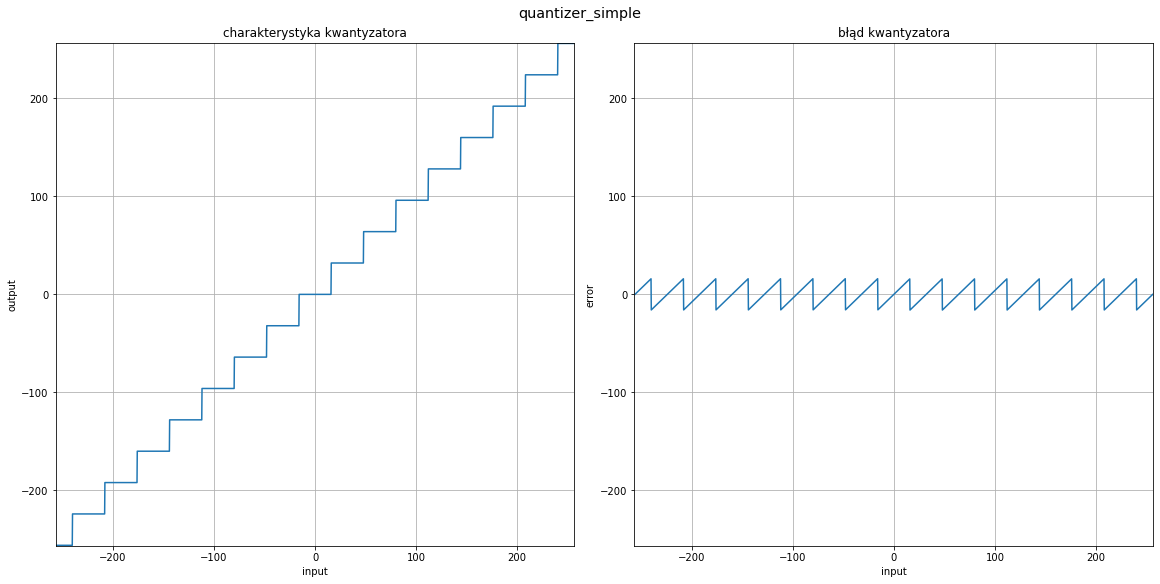

In [28]:
#draw quantizer characteristic
draw_quantizer_characteristic(quantizer_simple)

---- 
## Zadanie 2
---- 
* Korzystając z prostego kwantyzatora, wylicz skwantowaną wersję przykładowych sygnałów (`signal_big` i `signal_small`).
* Narysuj dwa wykresy (osobno dla `signal_big` i `signal_small`). Na każdym wykresie narysuj sygnał oryginalny i skwantowany.

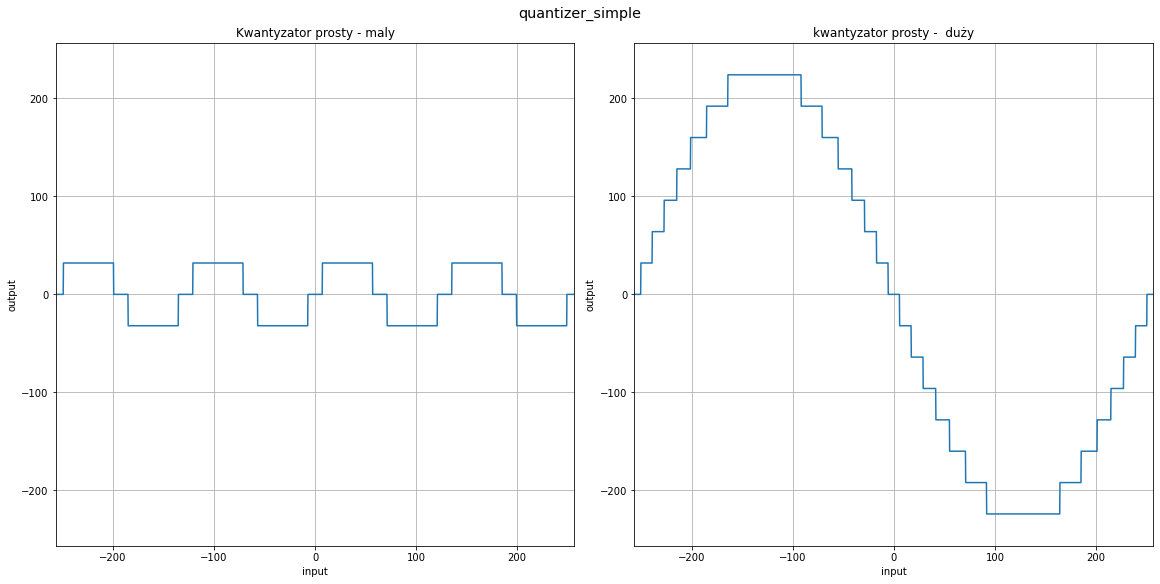

In [64]:
#draw plots
test           = np.linspace(-amplitude, amplitude, 2000)
fig, axs = plt.subplots(1, 2, figsize=default_figsize_1x2, constrained_layout=True)
st = fig.suptitle(str(quantizer_simple.__name__), fontsize="x-large")
characteristic = quantizer_simple(signal_small)
quant_error    =  test - characteristic
axs[0].plot(test, characteristic)
axs[0].set_title("Kwantyzator prosty - maly")
axs[0].set_ylabel("output")
axs[0].set_xlabel("input")
axs[0].set_xlim([plot_range_min, plot_range_max])
axs[0].set_ylim([plot_range_min, plot_range_max])
axs[0].grid(),
characteristic = quantizer_simple(signal_big)
quant_error    =  test - characteristic
axs[1].plot(test, characteristic)
axs[1].set_title("kwantyzator prosty -  duży")
axs[1].set_ylabel("output")
axs[1].set_xlabel("input")
axs[1].set_xlim([plot_range_min, plot_range_max])
axs[1].set_ylim([plot_range_min, plot_range_max])
axs[1].grid()


---- 
## Zadanie 3
---- 
W dwóch sąsiednich oknach narysuj histogramy dla sygnału oryginalnego (`signal_big`) i skwanowanego (wyliczonego na bazie `signal_big`).  
Do narysowania histogramów można wykorzystać metodę `hist` z biblioteki `matplotlib`.

(array([ 0.,  0.,  0.,  0., 56., 90., 52., 42., 36., 32., 29., 27., 25.,
        24., 23., 21., 21., 21., 19., 19., 19., 18., 18., 17., 17., 17.,
        17., 16., 16., 16., 15., 16., 15., 15., 15., 15., 15., 14., 15.,
        14., 15., 14., 15., 14., 14., 14., 14., 14., 14., 15., 15., 14.,
        14., 14., 14., 14., 14., 15., 14., 15., 14., 15., 14., 15., 15.,
        15., 15., 15., 16., 15., 16., 16., 16., 17., 17., 17., 17., 18.,
        18., 19., 19., 19., 21., 21., 21., 23., 24., 25., 27., 29., 32.,
        36., 42., 52., 90., 56.,  0.,  0.,  0.,  0.]),
 array([-2.55000000e+02, -2.49900000e+02, -2.44800000e+02, -2.39700000e+02,
        -2.34600000e+02, -2.29500000e+02, -2.24400000e+02, -2.19300000e+02,
        -2.14200000e+02, -2.09100000e+02, -2.04000000e+02, -1.98900000e+02,
        -1.93800000e+02, -1.88700000e+02, -1.83600000e+02, -1.78500000e+02,
        -1.73400000e+02, -1.68300000e+02, -1.63200000e+02, -1.58100000e+02,
        -1.53000000e+02, -1.47900000e+02, -1.42800000e

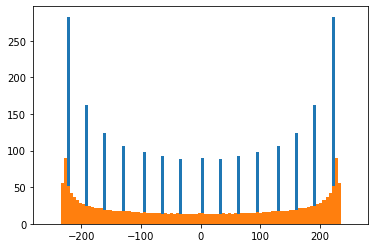

In [63]:
#draw histograms
big_quantizer_simple = quantizer_simple(signal_big)
small_quantize_simple = quantizer_simple(signal_small)
plt.hist(signal_big, 100, (-255, 255))  # rozkład wartości próbek przed kwantyzacją
plt.hist(big_quantizer_simple, 100, (-255, 255)) # rozkład wartości próbek po kwantyzacji



---- 
## Zadanie 4
---- 
Powtórz kroki 1, 2 i 3 dla kwantyzatora ze strefą martwą.

(array([  0.,   0.,   0.,   0.,   0.,   0., 283.,   0.,   0.,   0.,   0.,
          0., 163.,   0.,   0.,   0.,   0.,   0., 124.,   0.,   0.,   0.,
          0.,   0., 106.,   0.,   0.,   0.,   0.,   0.,   0.,  98.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 452.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  98.,   0.,   0.,   0.,   0.,   0.,   0., 106.,   0.,
          0.,   0.,   0.,   0., 124.,   0.,   0.,   0.,   0.,   0., 163.,
          0.,   0.,   0.,   0.,   0., 283.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-2.55000000e+02, -2.49900000e+02, -2.44800000e+02, -2.39700000e+02,
        -2.34600000e+02, -2.29500000e+02, -2.24400000e+02, -2.19300000e+02,
        -2.14200000e+02, -2.09100000e+02, -2.04000000e+02, -1.98900000e+02,
        -1.93800000e+02, -1.88700000e+02, -1.83600000e+02, -1.78500000e+02,
        -1.734

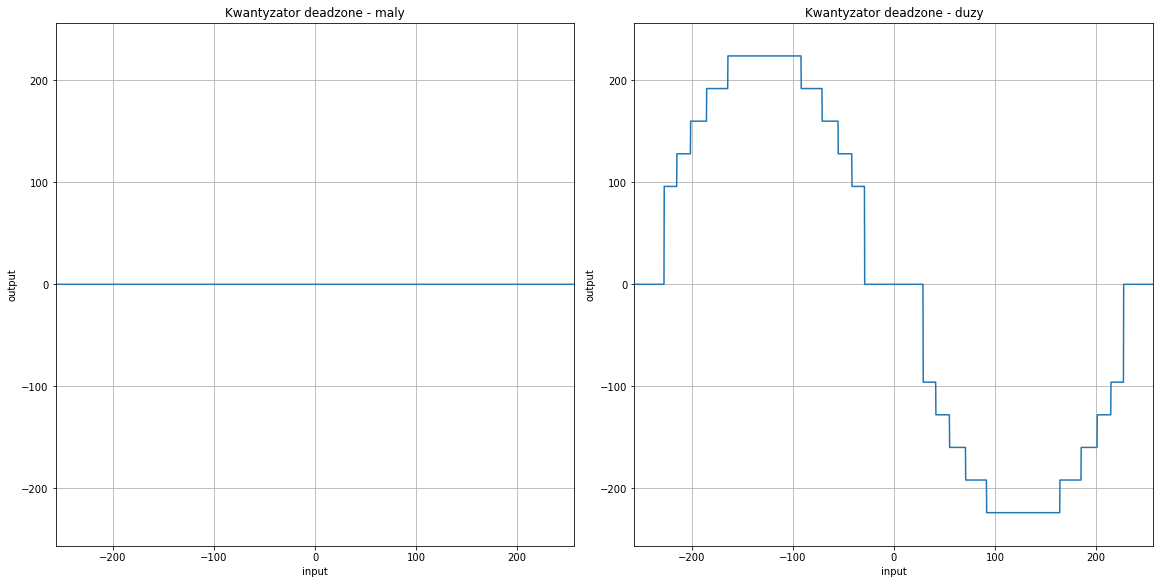

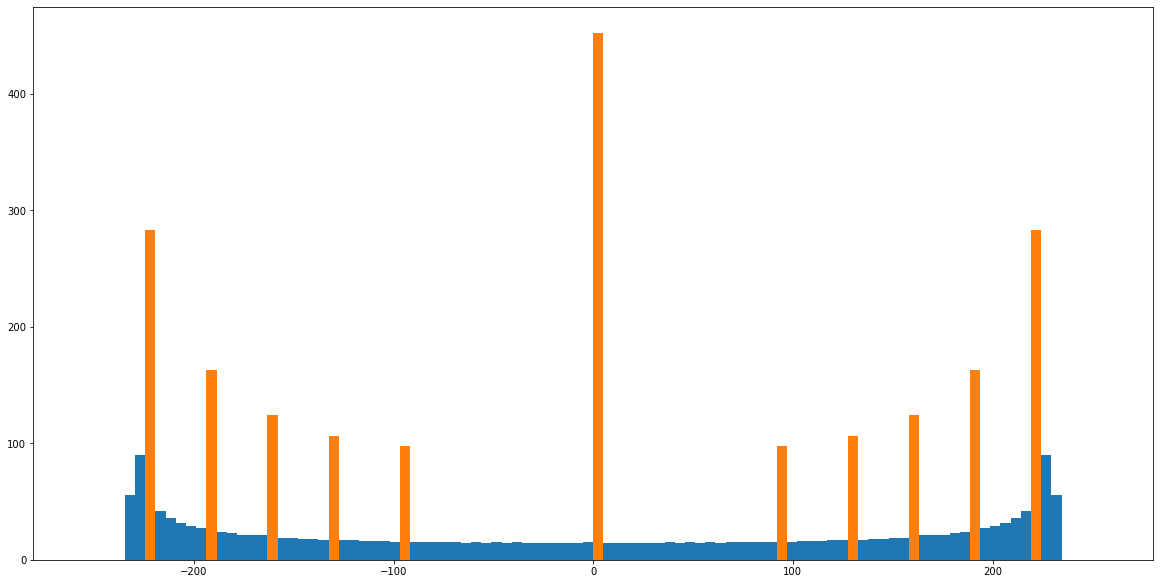

In [72]:
#draw quantizer characteristic
test = np.linspace(-amplitude, amplitude, 2000) # wektor czasu
fig, axs = plt.subplots(1, 2, figsize=default_figsize_1x2, constrained_layout=True)
#rysunek mały martwa strefa - sygnał się wyzerował bo znalazł się w martwej strefie
characteristic = quantizer_deadzone(signal_small)
quant_error    =  test - characteristic
axs[0].plot(test, characteristic)
axs[0].set_title("Kwantyzator deadzone - maly") 
axs[0].set_ylabel("output")
axs[0].set_xlabel("input")
axs[0].set_xlim([plot_range_min, plot_range_max])
axs[0].set_ylim([plot_range_min, plot_range_max])
axs[0].grid(),
#rysunek duży martwa strefa
characteristic = quantizer_deadzone(signal_big)
quant_error    =  test - characteristic
axs[1].plot(test, characteristic)
axs[1].set_title("Kwantyzator deadzone - duzy")
axs[1].set_ylabel("output")
axs[1].set_xlabel("input")
axs[1].set_xlim([plot_range_min, plot_range_max])
axs[1].set_ylim([plot_range_min, plot_range_max])
axs[1].grid()
#draw histograms
fig, axs = plt.subplots(1, 1, figsize=default_figsize_1x2, constrained_layout=True)
plt.hist(signal_big, 100, (-255, 255))  # rozkład wartości próbek przed kwantyzacją
plt.hist(characteristic, 100, (-255, 255)) # rozkład wartości próbek po kwantyzacji


---- 
## Zadanie 5
---- 
Kwantyzacja stosowana w kodekach fonii i wizyjnych. Kwantowanie to przypisywanie pewnej reprezentacji do przedziałów.
Zaokrąglanie i skalowanie to jeden ze sposobów realizacji kwantowanie.  

W trzech sąsiednich oknach narysuj wykresy:  
* sygnał oryginalny + skwantowany (z użyciem `quantizer_simple`)
* sygnał skwantowany i przeskalowany (z użyciem `quantize_and_scale`)
* sygnał przeskalowany do oryginalnego zakresu (z użyciem `inverse_scale`)

Wykorzystaj funkcje:
* `quantize_and_scale` - realizującą operację kwantyzacji i skalowania
* `inverse_scale` - realizującą operację odwrotnego skalowania

In [73]:
def quantize_and_scale(signal):
    signal_sign  = np.sign(signal)
    signal_magn  = np.abs (signal)
    signal_quant = np.floor(signal_magn/step_size + 0.5)
    return signal_sign * signal_quant

def inverse_scale(signal):
    return step_size*signal

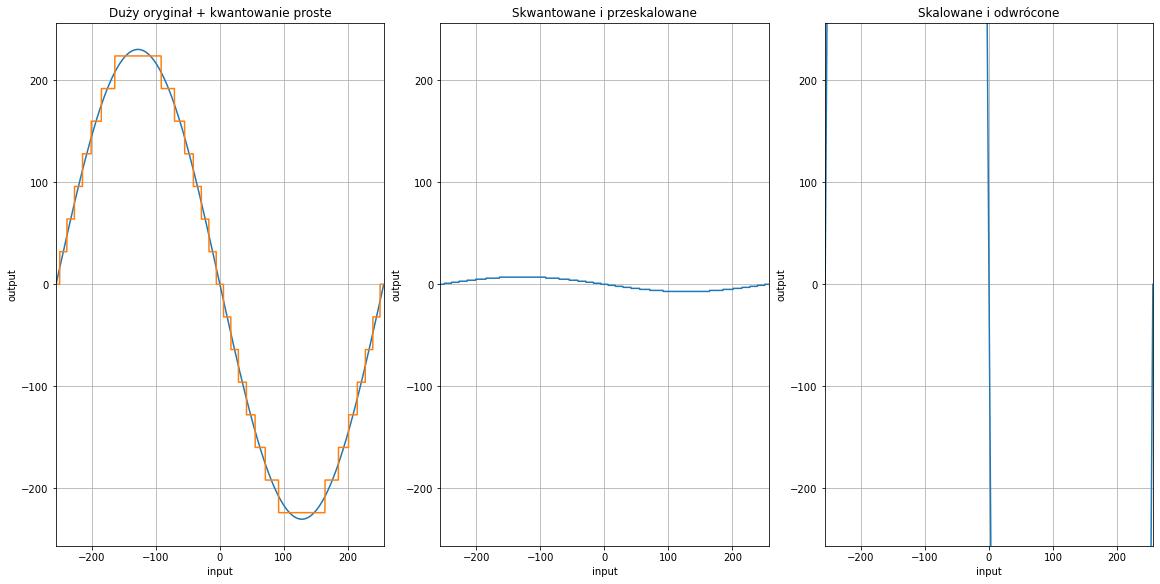

In [81]:
#calculate signal_quant
fig, axs = plt.subplots(1, 3, figsize=default_figsize_1x2, constrained_layout=True)
# oryginał duży
axs[0].plot(test, signal_big)
axs[0].set_title("Duży oryginał + kwantowanie proste") 
axs[0].set_ylabel("output")
axs[0].set_xlabel("input")
axs[0].set_xlim([plot_range_min, plot_range_max])
axs[0].set_ylim([plot_range_min, plot_range_max])
axs[0].grid(),
#skwantowany duży
characteristic = quantizer_simple(signal_big)
quant_error    =  test - characteristic
axs[0].plot(test, characteristic)
#calculate signal_quant_scaled
characteristic = quantize_and_scale(signal_big)
quant_error    =  test - characteristic
axs[1].plot(test, characteristic)
axs[1].set_title("Skwantowane i przeskalowane")
axs[1].set_ylabel("output")
axs[1].set_xlabel("input")
axs[1].set_xlim([plot_range_min, plot_range_max])
axs[1].set_ylim([plot_range_min, plot_range_max])
axs[1].grid()
#calculate signal_inv_scaled
characteristic = inverse_scale(signal_big)
quant_error    =  test - characteristic
axs[2].plot(test, characteristic)
axs[2].set_title("Skalowane i odwrócone")
axs[2].set_ylabel("output")
axs[2].set_xlabel("input")
axs[2].set_xlim([plot_range_min, plot_range_max])
axs[2].set_ylim([plot_range_min, plot_range_max])
axs[2].grid()

#(optional) draw histograms

---- 
## Zadanie 6 Demonstacja działania kwantyzatora na obrazach
---- 
* uruchom demo
* przetestój różne wartości kroku kwantyzacji (`qstep`) i szerokości strefy martwej (`deadzone`)

Text(0.5, 1.0, 'lena_quant_dead')

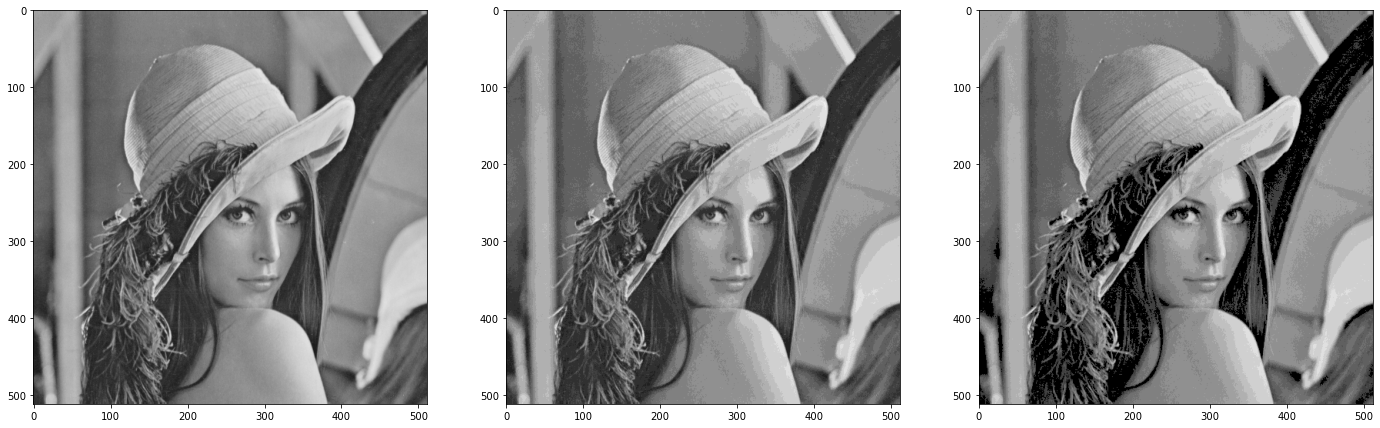

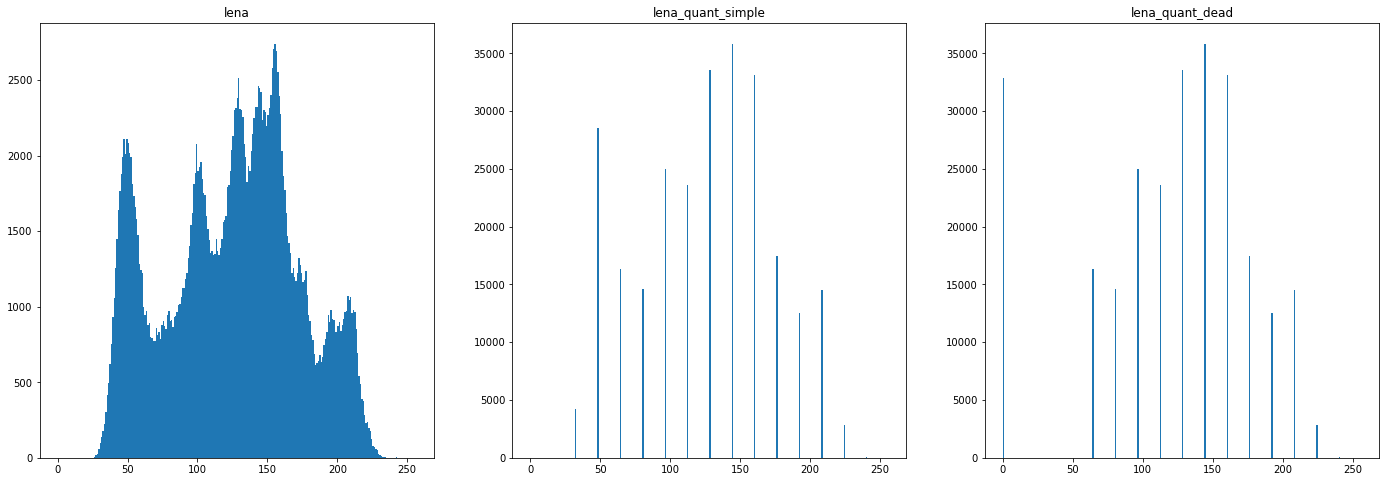

In [82]:
lena = imageio.imread('lena.png')
#quantization
lena_quant_simple = quantizer_simple  (lena, qstep=16)
lena_quant_dead   = quantizer_deadzone(lena, qstep=16, deadzone=3.0)
#display images
figImg, axsImg = plt.subplots(1, 3, figsize=[24, 8])
axsImg[0].imshow(lena,              cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[1].imshow(lena_quant_simple, cmap=plt.cm.gray, vmin=0, vmax=255)
axsImg[2].imshow(lena_quant_dead  , cmap=plt.cm.gray, vmin=0, vmax=255)
#display histograms
figH, axsH = plt.subplots(1, 3, figsize=[24, 8])
axsH[0].hist(lena.ravel().astype(int), bins=256, range=[0, 256])
axsH[0].set_title("lena")
axsH[1].hist(lena_quant_simple.ravel().astype(int), bins=256, range=[0, 256])
axsH[1].set_title("lena_quant_simple")
axsH[2].hist(lena_quant_dead.ravel().astype(int), bins=256, range=[0, 256])
axsH[2].set_title("lena_quant_dead")

# na drugim widać błąd kwantyzacji -> na ramieniu takie paski jakby
# na trzecim ze względu na martwą strefę blisko 0, czernie są bardziej czarne, wyraźniejsze
